<a href="https://www.kaggle.com/code/maimunulkjisan/supermarket-sales-usa-trends-forecasts?scriptVersionId=217583578" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚀 **Exploratory Data Analysis (EDA) and Predicting Future Sales** 🚀

Welcome to this notebook, where we explore a retail dataset spanning **4 years**. The goal is to perform an in-depth analysis of sales trends, shipping durations, and customer behaviors, followed by forecasting the next **7 days of sales**. This notebook highlights key insights using interactive visualizations and predictive modeling. Let’s dive in!

## 📌 Introduction
In this notebook, we will:

🧹 Clean and preprocess the data for meaningful analysis.

🔎 Perform an in-depth Exploratory Data Analysis (EDA) to understand trends and patterns.

📈 Visualize insights through interactive and intuitive graphs.

## 📋 **Dataset Description**

| **Column Name**      | **Description**                                                                                  | **Example Value**                          |
|-----------------------|--------------------------------------------------------------------------------------------------|--------------------------------------------|
| `Order ID`           | Unique identifier for each order.                                                               | CA-2015-103800                             |
| `Order Date`         | The date when the order was placed.                                                             | 2015-01-03                                 |
| `Ship Date`          | The date when the order was shipped.                                                            | 2015-01-07                                 |
| `Ship Mode`          | The shipping method used for delivery.                                                          | Standard Class                             |
| `Customer ID`        | Unique identifier for each customer.                                                            | DP-13000                                   |
| `Customer Name`      | Name of the customer who placed the order.                                                      | Darren Powers                              |
| `Segment`            | The market segment the customer belongs to.                                                    | Consumer                                   |
| `Country`            | The country where the order was placed.                                                        | United States                              |
| `City`               | The city where the order was placed.                                                           | Houston                                    |
| `State`              | The state where the order was placed.                                                          | Texas                                      |
| `Postal Code`        | The postal code for the shipping address.                                                      | 77095                                      |
| `Region`             | The region where the order originated.                                                         | Central                                    |
| `Product ID`         | Unique identifier for each product.                                                            | OFF-PA-10000174                            |
| `Category`           | The main category of the product.                                                              | Office Supplies                            |
| `Sub-Category`       | The sub-category of the product.                                                               | Paper                                      |
| `Product Name`       | The name or description of the product.                                                        | Message Book, Wirebound...                 |
| `Sales`              | Total sales amount for the order.                                                              | 16.448                                     |


# ⚙️ Data Import and Cleaning
🔍 In this section, we import the dataset, clean missing values, and preprocess date columns for time-series analysis.
Code Steps:

Import necessary libraries.
Load the dataset.
Handle missing values in the Postal Code column.
Convert Order Date and Ship Date into datetime format.
Sort data by Order Date.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv", index_col='Row ID')
print(df.info())

# Convert dates and clean data
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df.sort_values(by=['Order Date'], ascending=True, inplace=True)
df.set_index('Order Date', inplace =True)


<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB
None


In [2]:
df.head(5)

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2015-01-03,CA-2015-103800,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
2015-01-04,CA-2015-112326,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
2015-01-05,CA-2015-141817,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


# 🛠 Handling Missing Values
We checked for missing values and filled the Postal Code column with the postal code for Burlington City.

In [3]:
df.isnull().sum()

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
df['Postal Code'].fillna(27217.0, inplace=True)  # Fill missing Postal Code values

### here null value available in Postal Code Burlington city, so here filling those null value with burlington postal code availbale in dataset

# 📊 Exploratory Data Analysis (EDA)
**In this section, we visualize trends and patterns in the dataset to gain insights into sales, shipping, and customer behaviors.**

# 📌 Sales by Category
**Visualization:** A pie chart showing the total sales across different product categories.

👉 This helps identify which category contributes the most to sales.

In [5]:
# Sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
fig1 = px.pie(sales_by_category, names='Category', values='Sales', title='Sales by Category', color='Category')
fig1.show()


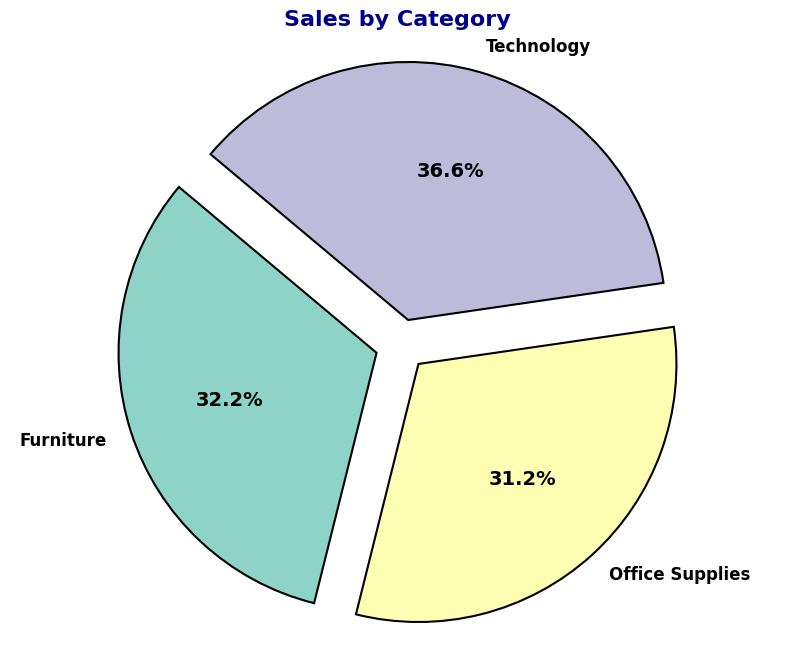

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

sns.set_theme(style="white", palette="muted")

fig, ax = plt.subplots(figsize=(10, 8))

colors = sns.color_palette("Set3", len(sales_by_category))

explode = [0.1] * len(sales_by_category)

wedges, texts, autotexts = ax.pie(
    sales_by_category['Sales'], 
    labels=sales_by_category['Category'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Sales by Category', fontsize=16, fontweight='bold', color='darkblue')

plt.axis('equal')

plt.show()


# 🌆 Sales by City (Top 10 Cities)
**Visualization:** A pie chart highlighting sales in the top 10 cities.

👉 This gives insights into geographic sales distribution.

In [7]:
# Top 10 cities by sales
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
top_10_sales_by_city = sales_by_city.head(10)
fig2 = px.pie(top_10_sales_by_city, names='City', values='Sales', title='Total Sales by City (Top 10)', color='City')
fig2.show()


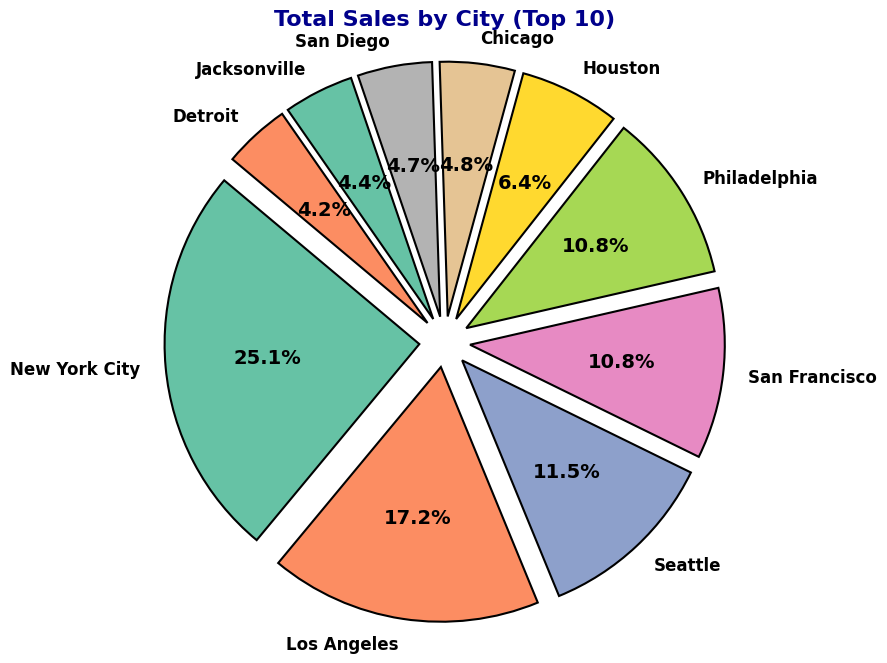

In [8]:
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
top_10_sales_by_city = sales_by_city.head(10)

sns.set_theme(style="white", palette="muted")

fig, ax = plt.subplots(figsize=(10, 8))

colors = sns.color_palette("Set2", len(top_10_sales_by_city))

explode = [0.1] * len(top_10_sales_by_city)

wedges, texts, autotexts = ax.pie(
    top_10_sales_by_city['Sales'], 
    labels=top_10_sales_by_city['City'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Total Sales by City (Top 10)', fontsize=16, fontweight='bold', color='darkblue')

plt.axis('equal')

plt.show()


# 🚚 Distribution of Shipping Duration
**Visualization:** A bar chart showing the distribution of shipping durations.

👉 This indicates the frequency of different shipping durations.


In [9]:
df.index = pd.to_datetime(df.index)
df['Shipping Duration'] = (df['Ship Date'] - df.index).dt.days
shipping_duration_counts = df['Shipping Duration'].value_counts().sort_index()

import plotly.express as px

fig = px.bar(
    x=shipping_duration_counts.index, 
    y=shipping_duration_counts.values, 
    labels={'x': 'Shipping Duration (days)', 'y': 'Frequency'}, 
    title='Distribution of Shipping Duration',
    text=shipping_duration_counts.values, 
)

fig.update_traces(marker_color='teal', textposition='outside') 
fig.show()


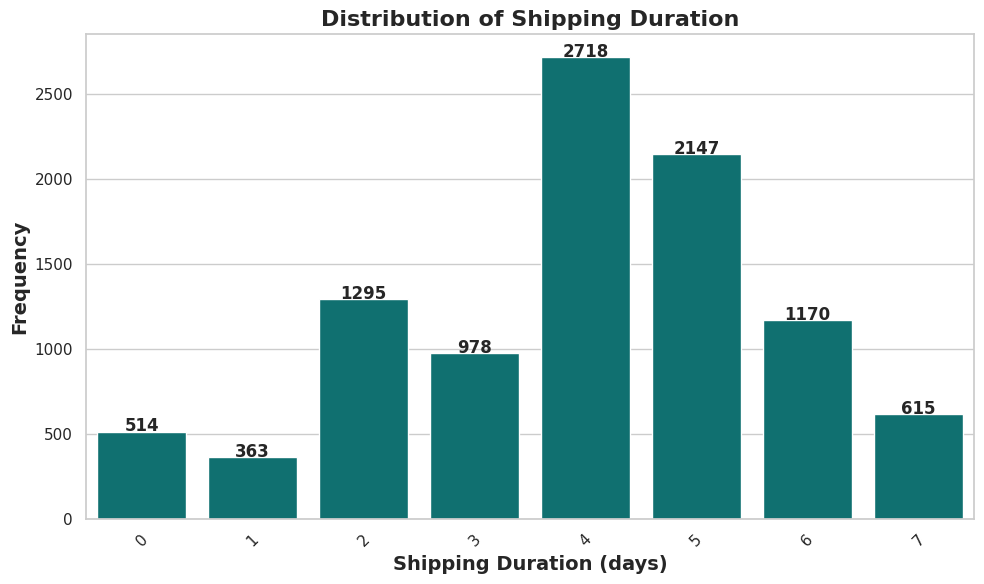

In [10]:
df.index = pd.to_datetime(df.index)
df['Shipping Duration'] = (df['Ship Date'] - df.index).dt.days
shipping_duration_counts = df['Shipping Duration'].value_counts().sort_index()

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    x=shipping_duration_counts.index, 
    y=shipping_duration_counts.values, 
    color='teal', 
    ax=ax
)

ax.set_xlabel('Shipping Duration (days)', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Shipping Duration', fontsize=16, fontweight='bold')

for i, v in enumerate(shipping_duration_counts.values):
    ax.text(shipping_duration_counts.index[i], v + 0.5, str(v), ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# 🌍 Sales by Region
**Visualization:**  A pie chart of total sales by region.

👉 This provides a clear view of which regions perform best.

In [11]:
# Sales by region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
fig4 = px.pie(sales_by_region, names='Region', values='Sales', title='Total Sales by Region', color='Region')
fig4.show()


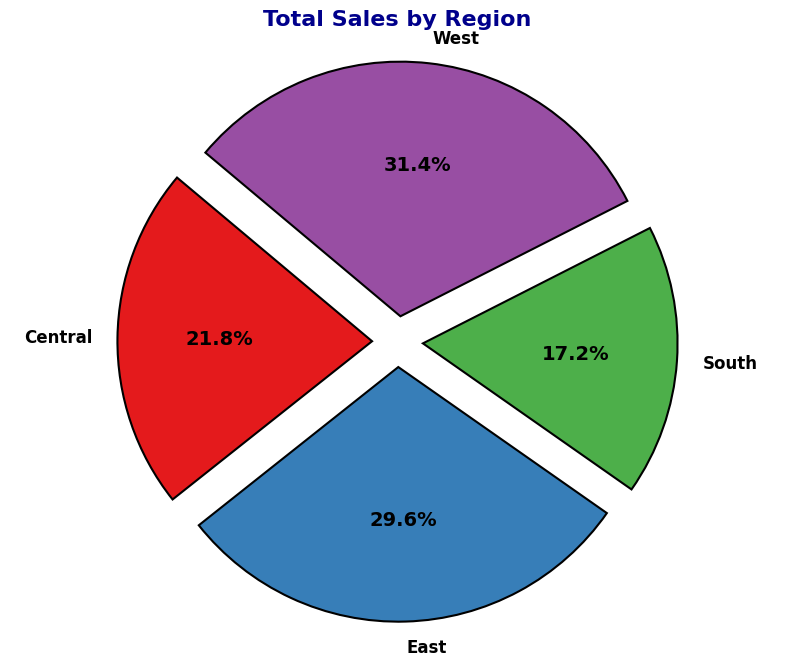

In [12]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
sns.set_theme(style="white", palette="muted")
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("Set1", len(sales_by_region))

explode = [0.1] * len(sales_by_region)

wedges, texts, autotexts = ax.pie(
    sales_by_region['Sales'], 
    labels=sales_by_region['Region'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Total Sales by Region', fontsize=16, fontweight='bold', color='darkblue')

plt.axis('equal')

plt.show()


### Company must be focus on increase sales in **South and Central** region

# 🛒 Sales by Sub-Category
**Visualization:** A pie chart for sales by sub-category.

👉 This helps understand the demand for specific products.

In [13]:
# Sales by sub-category
sales_by_sub_category = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_sub_category = sales_by_sub_category.sort_values(by='Sales', ascending=False)
fig5 = px.pie(sales_by_sub_category, names='Sub-Category', values='Sales', title='Total Sales by Sub-Category', color='Sub-Category')
fig5.show()


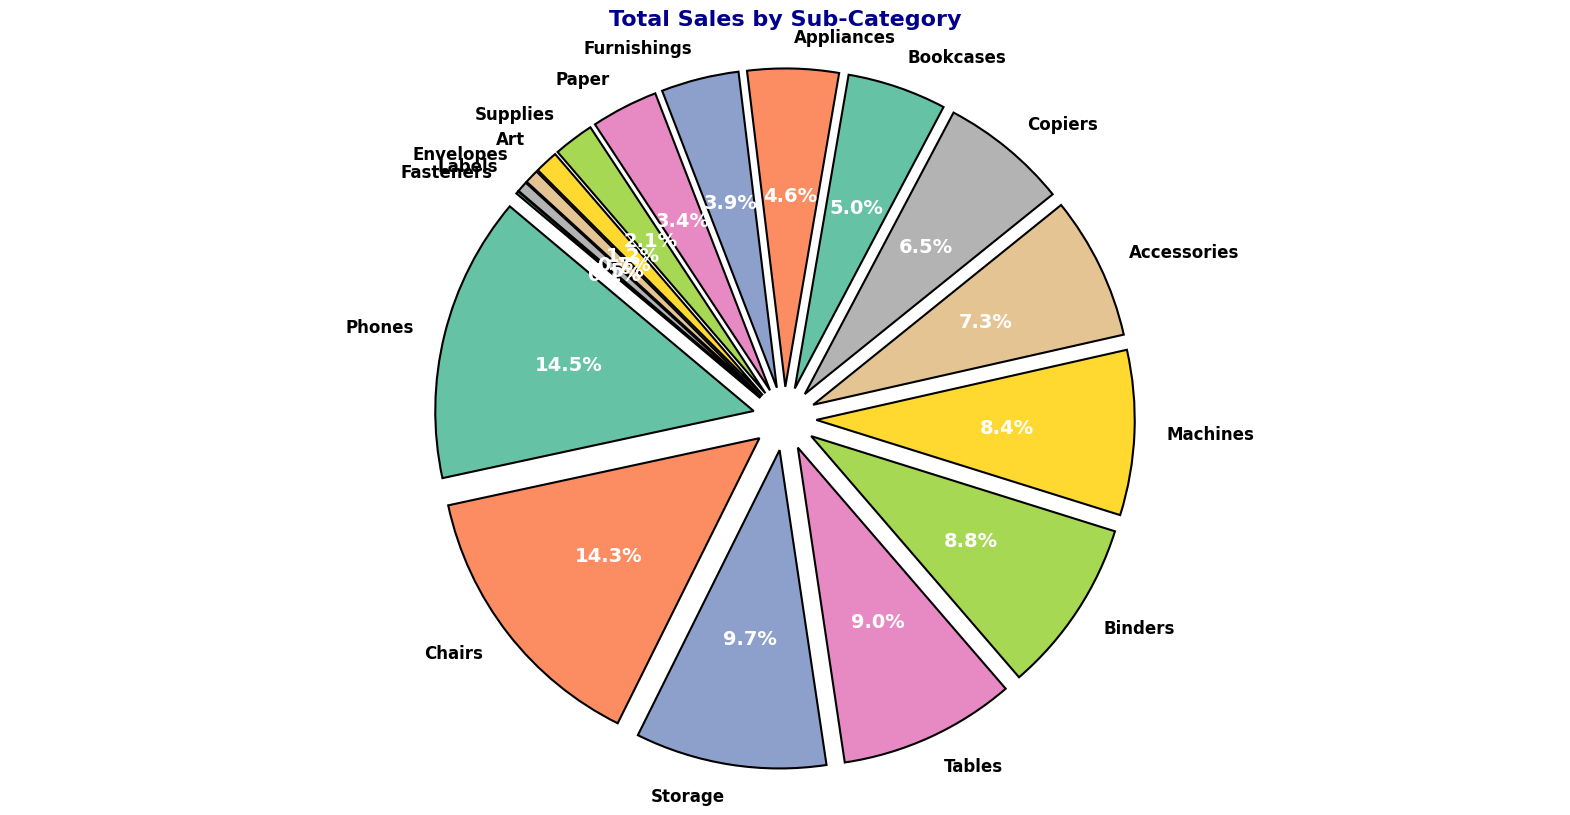

In [14]:
sales_by_sub_category = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_sub_category = sales_by_sub_category.sort_values(by='Sales', ascending=False)

sns.set_theme(style="white", palette="muted")

fig, ax = plt.subplots(figsize=(20, 10))  # Increased width and height

colors = sns.color_palette("Set2", len(sales_by_sub_category))

explode = [0.1] * len(sales_by_sub_category)

wedges, texts, autotexts = ax.pie(
    sales_by_sub_category['Sales'], 
    labels=sales_by_sub_category['Sub-Category'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.title('Total Sales by Sub-Category', fontsize=16, fontweight='bold', color='darkblue')

plt.axis('equal')

plt.show()


# 👩‍💼 Top 10 Customers by Total Sales
**Visualization:** A pie chart showing the top 10 customers contributing to sales.

👉 This analysis identifies high-value customers.

In [15]:
# Top 10 customers by sales
sales_by_customer = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).reset_index()
top_10_sales_by_customer = sales_by_customer.head(10)
fig6 = px.pie(top_10_sales_by_customer, names='Customer Name', values='Sales', title='Top 10 Customers by Total Sales', color='Customer Name')
fig6.show()


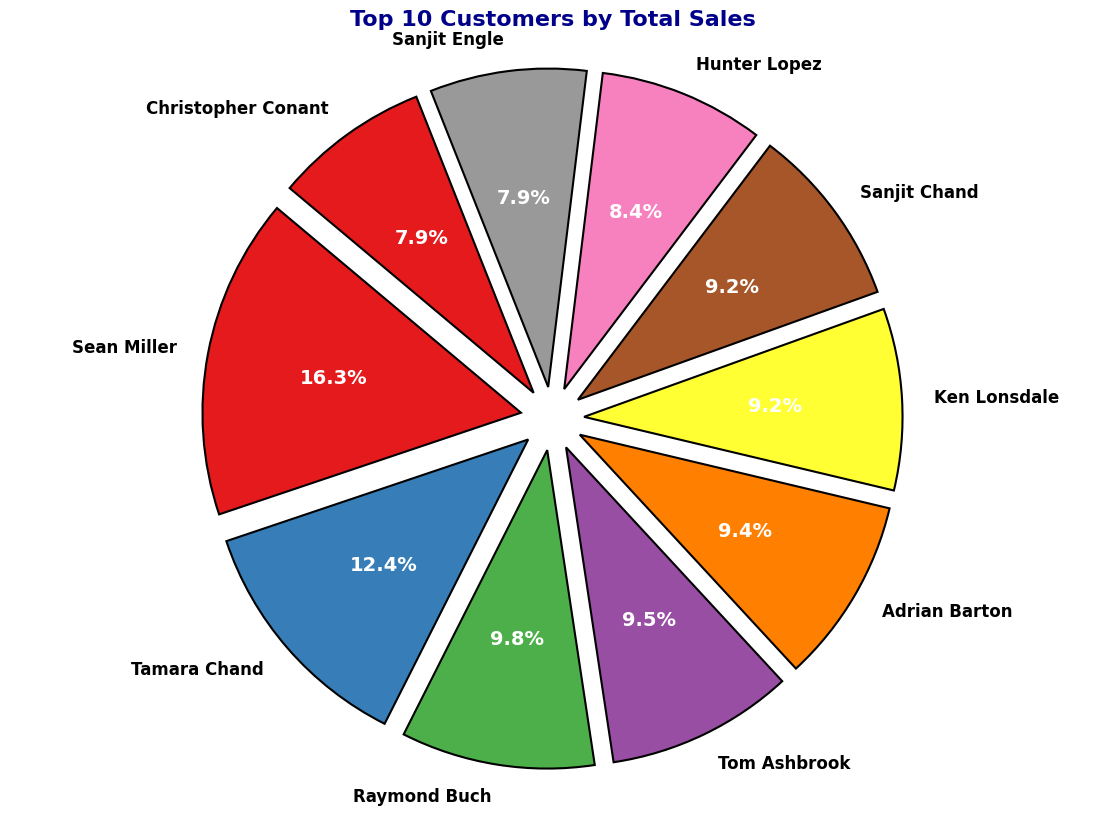

In [16]:
sales_by_customer = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).reset_index()
top_10_sales_by_customer = sales_by_customer.head(10)

sns.set_theme(style="white", palette="muted")

fig, ax = plt.subplots(figsize=(14, 10))

colors = sns.color_palette("Set1", len(top_10_sales_by_customer))

explode = [0.1] * len(top_10_sales_by_customer)

wedges, texts, autotexts = ax.pie(
    top_10_sales_by_customer['Sales'], 
    labels=top_10_sales_by_customer['Customer Name'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.title('Top 10 Customers by Total Sales', fontsize=16, fontweight='bold', color='darkblue')

plt.axis('equal')

plt.show()


# ⏱ Average Shipping Duration by Sub-Category
**Visualization:** A bar chart displaying average shipping duration for each product sub-category.

In [17]:
# Average shipping duration by sub-category
avg_shipping_duration_by_sub_category = df.groupby('Sub-Category')['Shipping Duration'].mean().reset_index()
fig = px.bar(avg_shipping_duration_by_sub_category, x='Sub-Category', y='Shipping Duration', title='Average Shipping Duration by Sub-Category', labels={'Shipping Duration': 'Average Shipping Duration (Days)', 'Sub-Category': 'Sub-Category'}, color='Sub-Category', text='Shipping Duration')
fig.show()


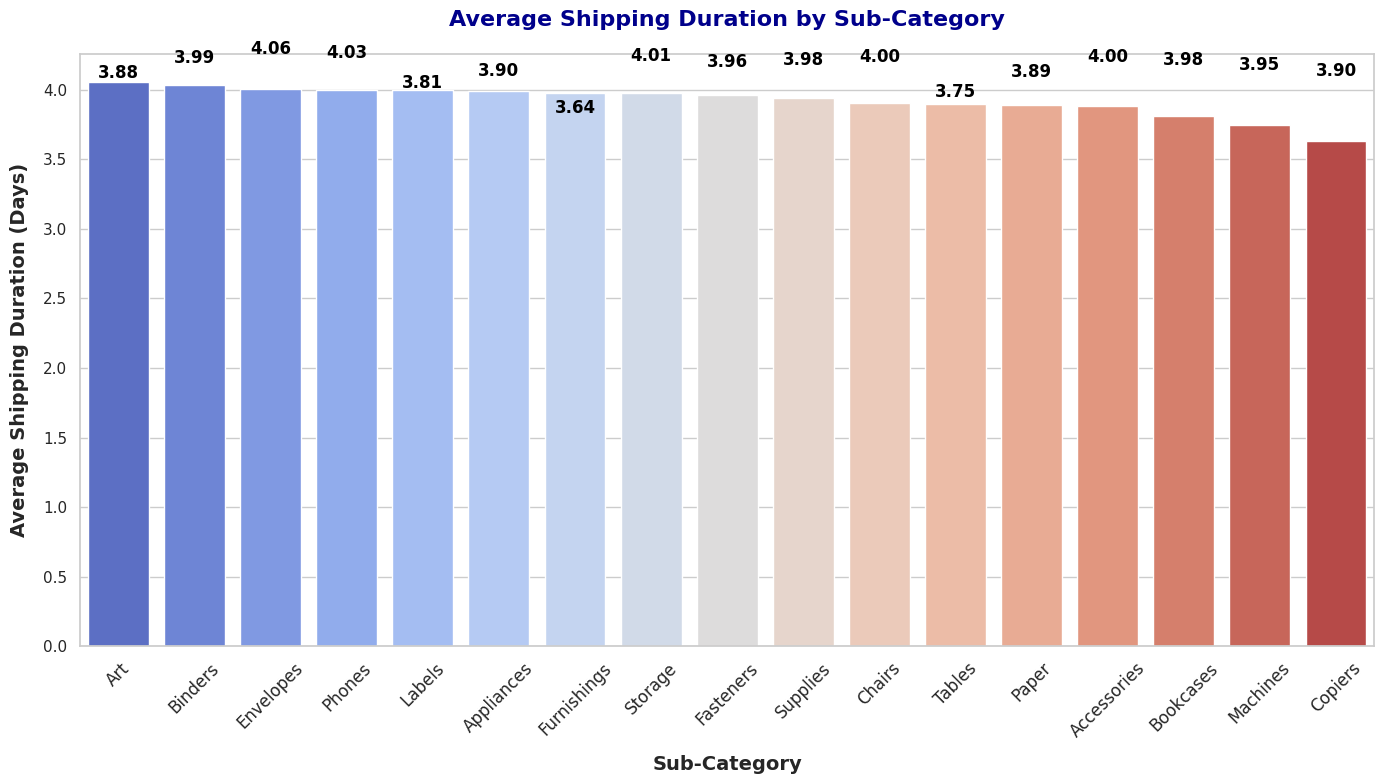

In [18]:
avg_shipping_duration_by_sub_category = df.groupby('Sub-Category')['Shipping Duration'].mean().reset_index()
avg_shipping_duration_by_sub_category = avg_shipping_duration_by_sub_category.sort_values(by='Shipping Duration', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=avg_shipping_duration_by_sub_category,
    x='Sub-Category',
    y='Shipping Duration',
    palette='coolwarm'
)

for index, row in avg_shipping_duration_by_sub_category.iterrows():
    barplot.text(
        x=index, 
        y=row['Shipping Duration'] + 0.2,
        s=f"{row['Shipping Duration']:.2f}", 
        ha='center', 
        fontsize=12, 
        fontweight='bold', 
        color='black'
    )

plt.title('Average Shipping Duration by Sub-Category', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Sub-Category', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Average Shipping Duration (Days)', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


# 🚢 Shipping Modes Used
**Visualization:** A bar chart of the count of different shipping modes.


In [19]:
# Shipping modes count
ship_mode_counts = df['Ship Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship Mode', 'Count']
fig = px.bar(ship_mode_counts, x='Ship Mode', y='Count', title='Count of Ship Modes Used', labels={'Ship Mode': 'Shipping Mode', 'Count': 'Number of Orders'}, color='Ship Mode', text='Count')
fig.show()


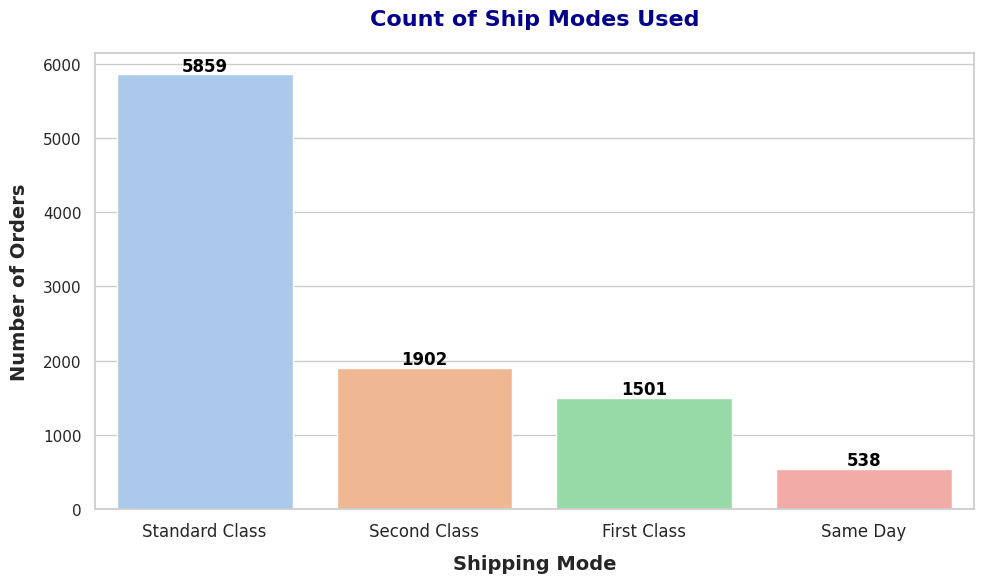

In [20]:
ship_mode_counts = df['Ship Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship Mode', 'Count']

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=ship_mode_counts,
    x='Ship Mode',
    y='Count',
    palette='pastel'
)

for index, row in ship_mode_counts.iterrows():
    barplot.text(
        x=index, 
        y=row['Count'] + 50,  # Slightly above the bar
        s=f"{row['Count']}", 
        ha='center', 
        fontsize=12, 
        fontweight='bold', 
        color='black'
    )

plt.title('Count of Ship Modes Used', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Shipping Mode', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()


# 📊 Sales by Segment
**Visualization:** A donut chart of total sales by customer segment.

In [21]:
# Sales by segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
fig = px.pie(sales_by_segment, names='Segment', values='Sales', title='Sales by Segment', color='Segment', hole=0.3)
fig.update_traces(hovertemplate='Segment: %{label}<br>Sales: $%{value:,.2f}<extra></extra>', textinfo='percent+label')
fig.show()


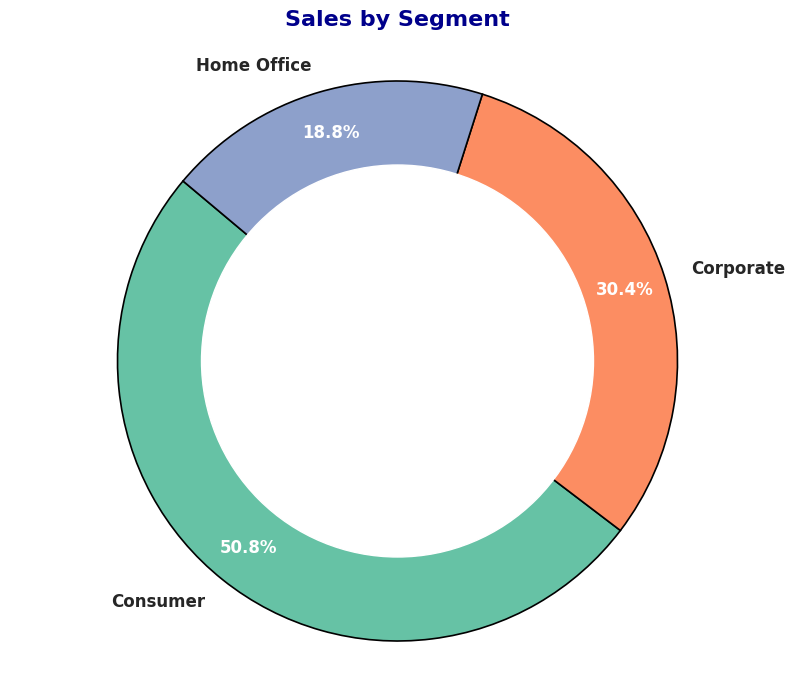

In [22]:
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_by_segment = sales_by_segment.sort_values(by='Sales', ascending=False)

sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(10, 8))

colors = sns.color_palette("Set2", len(sales_by_segment))

wedges, texts, autotexts = ax.pie(
    sales_by_segment['Sales'], 
    labels=sales_by_segment['Segment'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}, 
    pctdistance=0.85
)

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    autotext.set_color('white')

plt.setp(texts, fontsize=12, fontweight='bold')
ax.set_title('Sales by Segment', fontsize=16, fontweight='bold', color='darkblue', pad=20)
ax.axis('equal')

inner_circle = plt.Circle((0, 0), 0.7, color='white', fc='white')
fig.gca().add_artist(inner_circle)

plt.show()


# Finding Top 10 Customers by Subcategory Based on Sales

To identify the top 10 customers who buy the most in each subcategory based on sales, we can follow these steps:

1. **Group the data by 'Customer Name' and 'Sub-Category'**: This will allow us to calculate the total sales for each customer within each subcategory.
2. **Sort the data by 'Sales' in descending order**: This ensures that the customers with the highest sales come first in each subcategory.
3. **Select the top 10 customers**: For each subcategory, we select the top 10 customers based on their sales.




In [23]:
sales_by_customer_subcategory = df.groupby(['Customer Name', 'Sub-Category'])['Sales'].sum().reset_index()
top_10_customers_subcategory = sales_by_customer_subcategory.sort_values(['Sub-Category', 'Sales'], ascending=[True, False])
top_10_customers_subcategory = top_10_customers_subcategory.groupby('Sub-Category').head(10)
fig = px.bar(
    top_10_customers_subcategory, 
    x='Customer Name', 
    y='Sales', 
    color='Sub-Category', 
    title='Top 10 Customers by Subcategory Based on Sales',
    labels={'Customer Name': 'Customer Name', 'Sales': 'Total Sales'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis={'categoryorder': 'total ascending'}
)
fig.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



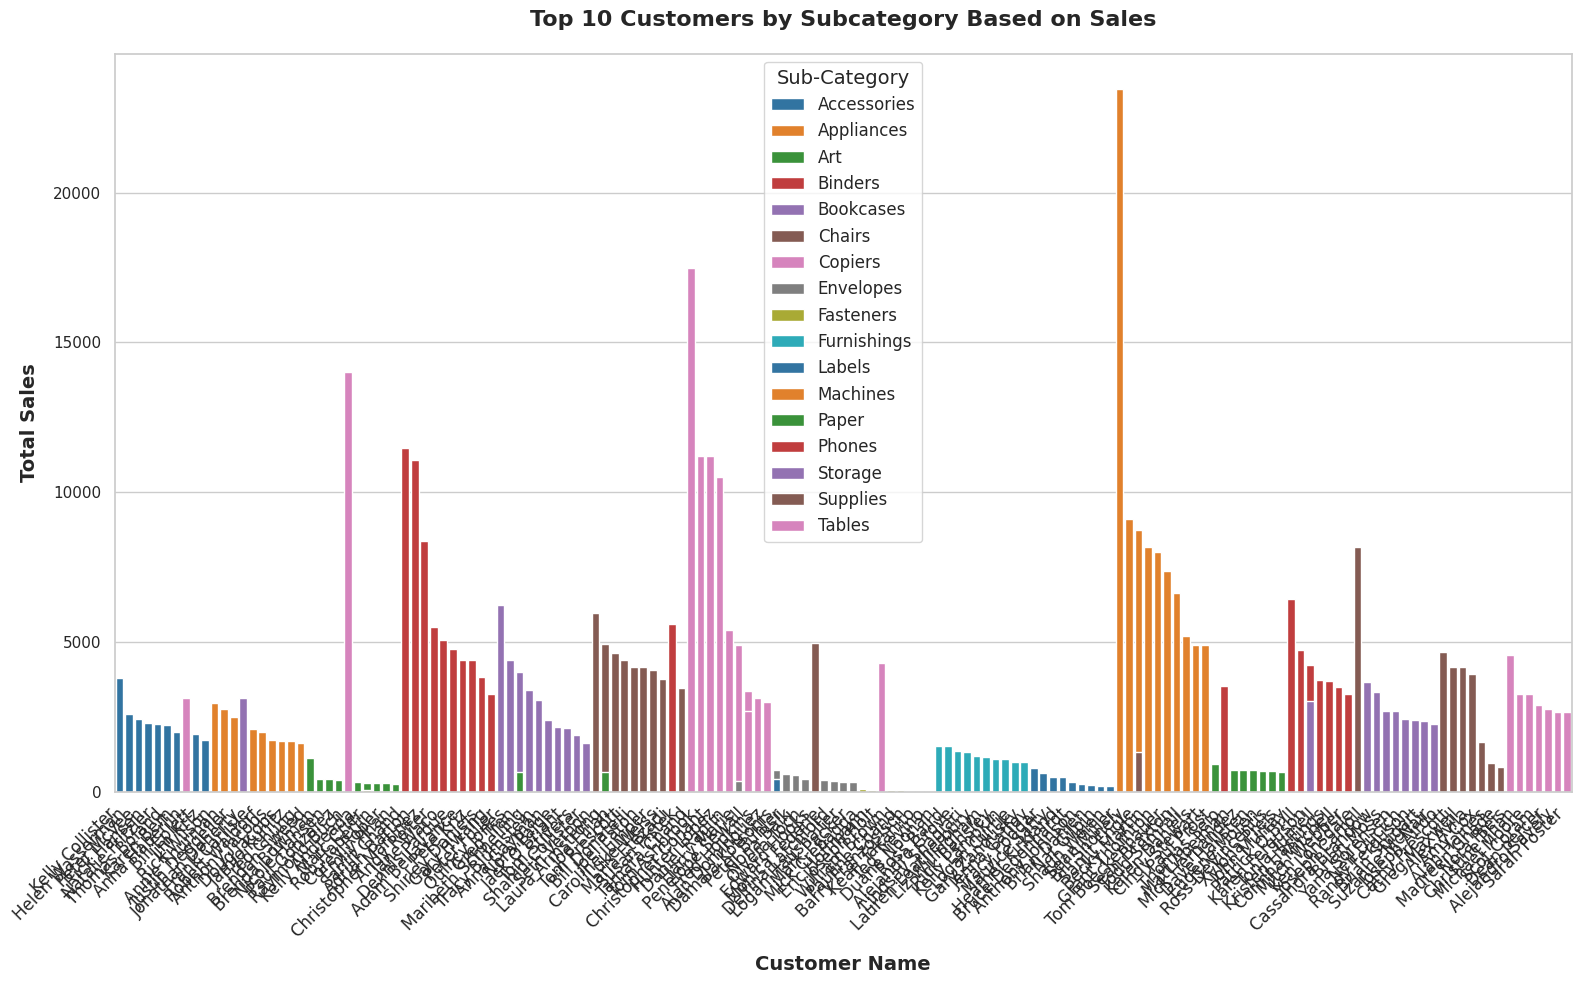

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sales_by_customer_subcategory = df.groupby(['Customer Name', 'Sub-Category'])['Sales'].sum().reset_index()
top_10_customers_subcategory = sales_by_customer_subcategory.sort_values(['Sub-Category', 'Sales'], ascending=[True, False])
top_10_customers_subcategory = top_10_customers_subcategory.groupby('Sub-Category').head(10)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(16, 10))

palette = sns.color_palette("tab10", n_colors=top_10_customers_subcategory['Sub-Category'].nunique())

sns.barplot(
    data=top_10_customers_subcategory, 
    x='Customer Name', 
    y='Sales', 
    hue='Sub-Category', 
    dodge=False, 
    palette=palette, 
    ax=ax
)

ax.set_title('Top 10 Customers by Subcategory Based on Sales', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Customer Name', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Total Sales', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, fontsize=12, ha='right')
ax.legend(title='Sub-Category', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()
